In [2]:
import pandas as pd

file  = './KBO_2019_player_gamestats.xlsx'
raw = pd.read_excel(file)
raw.head()

,Team,Name,DOB,Date,Opponent,Result,GS,AB,R,H,...,SH,SF,AVG,OBP,SLG,OPS,DIPS,avLI,RE24,WPA
0,Doosan,페르난데스,1988-04-27,2021-03-23,Hanhwa,W 5:4,1,4,0,2,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,Doosan,페르난데스,1988-04-27,2021-03-24,Hanhwa,L 1:11,1,2,0,0,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,Doosan,페르난데스,1988-04-27,2021-03-26,kiwoom,W 7:2,1,2,2,0,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,Doosan,페르난데스,1988-04-27,2021-03-27,kiwoom,W 3:2,1,4,1,3,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,Doosan,페르난데스,1988-04-27,2021-03-28,kiwoom,L 4:5,1,3,1,0,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [4]:
#find list of teams 
raw['Opponent'].unique()

array(['Hanhwa', 'kiwoom', '@Samsung', 'KT', 'NC', '@lotte', '@LG', 'SK',
       '@KIA', '@kiwoom', 'lotte', '@Hanhwa', 'LG', 'KIA', '@NC',
       'Samsung', '@SK', '@KT', 'Doosan', '@Doosan'], dtype=object)

In [13]:
#raw['Opponent'] @ means play away from home; else Home games.
#divide ['Opponent'] col to home_away and home games 
opp_list = [ ]
home_away_list = [ ]

for opp in raw['Opponent']:
    if "@" in opp:
        home_away = 'Away'
        opp = opp.replace('@', '')
    else:
        home_away = 'Home'
    home_away_list.append(home_away)
    opp_list.append(opp)

raw['Home_away'] = home_away_list
raw['Opp team'] = opp_list
raw.head()

,Team,Name,DOB,Date,Opponent,Result,GS,AB,R,H,...,SLG,OPS,DIPS,avLI,RE24,WPA,Home_away,opp,opp team,Opp team
0,Doosan,페르난데스,1988-04-27,2021-03-23,Hanhwa,W 5:4,1,4,0,2,...,0.750,1.250,19,1.98,1.65,0.429,Home,Hanhwa,Hanhwa,Hanhwa
1,Doosan,페르난데스,1988-04-27,2021-03-24,Hanhwa,L 1:11,1,2,0,0,...,0.500,0.833,4,0.77,-0.36,-0.038,Home,Hanhwa,Hanhwa,Hanhwa
2,Doosan,페르난데스,1988-04-27,2021-03-26,kiwoom,W 7:2,1,2,2,0,...,0.375,0.775,16,1.56,0.98,0.146,Home,kiwoom,kiwoom,kiwoom
3,Doosan,페르난데스,1988-04-27,2021-03-27,kiwoom,W 3:2,1,4,1,3,...,0.500,1.000,11,1.53,1.29,0.189,Home,kiwoom,kiwoom,kiwoom
4,Doosan,페르난데스,1988-04-27,2021-03-28,kiwoom,L 4:5,1,3,1,0,...,0.400,0.874,23,2.04,-0.30,-0.166,Home,kiwoom,kiwoom,kiwoom


In [17]:
#Player/opponent teams performance record
factors = ['AB','H','HR', 'TB', 'RBI','BB', 'HBP', 'SF']
data = raw.pivot_table(index = ['Team','Name','DOB', 'Opp team'],
                      values = factors,
                       
                       
                      aggfunc = 'sum')
data.head(10)

AB  BB  H  HBP  HR  RBI  SF  TB
Team   Name DOB        Opp team                                 
Doosan 국해성  1989-10-08 Hanhwa     8   0  2    0   0    0   0   3
                       KIA        7   0  0    0   0    1   0   0
                       KT         5   0  0    0   0    0   0   0
                       LG         5   2  2    0   0    1   0   3
                       NC         1   0  1    0   0    0   0   2
                       SK         7   2  0    0   0    0   0   0
                       Samsung    0   0  0    0   0    0   0   0
                       kiwoom     4   1  1    1   0    0   0   2
                       lotte      1   0  1    0   0    0   0   1
       권혁   1983-11-06 NC         0   0  0    0   0    0   0   0

In [18]:
#At Bat greater than 0 will be selected
cond = data['AB'] > 0 
data = data[ cond ]
data.head(10)

AB  BB  H  HBP  HR  RBI  SF  TB
Team   Name DOB        Opp team                                 
Doosan 국해성  1989-10-08 Hanhwa     8   0  2    0   0    0   0   3
                       KIA        7   0  0    0   0    1   0   0
                       KT         5   0  0    0   0    0   0   0
                       LG         5   2  2    0   0    1   0   3
                       NC         1   0  1    0   0    0   0   2
                       SK         7   2  0    0   0    0   0   0
                       kiwoom     4   1  1    1   0    0   0   2
                       lotte      1   0  1    0   0    0   0   1
       김경호  1995-07-31 Hanhwa     8   0  1    0   0    0   0   1
                       KIA        3   0  0    0   0    0   0   0

In [19]:
data = data.reset_index()
data.head()

,Team,Name,DOB,Opp team,AB,BB,H,HBP,HR,RBI,SF,TB
0,Doosan,국해성,1989-10-08,Hanhwa,8,0,2,0,0,0,0,3
1,Doosan,국해성,1989-10-08,KIA,7,0,0,0,0,1,0,0
2,Doosan,국해성,1989-10-08,KT,5,0,0,0,0,0,0,0
3,Doosan,국해성,1989-10-08,LG,5,2,2,0,0,1,0,3
4,Doosan,국해성,1989-10-08,NC,1,0,1,0,0,0,0,2


In [20]:
#func to calculate AVG/OBP/SLG/OPS of a batter 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['AVG'] = df['H'] / df['AB']
    df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['HBP'] + df['SF'])
    df['SLG'] = df['TB'] / df['AB']
    df['OPS'] = df['OBP'] + df['SLG']
    return df

In [21]:
# Batter/Opponent team performance  
player_stats_opp = cal_hit(data)
player_stats_opp

,Team,Name,DOB,Opp team,AB,BB,H,HBP,HR,RBI,SF,TB,AVG,OBP,SLG,OPS
0,Doosan,국해성,1989-10-08,Hanhwa,8,0,2,0,0,0,0,3,0.250000,0.250000,0.375000,0.625000
1,Doosan,국해성,1989-10-08,KIA,7,0,0,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000
2,Doosan,국해성,1989-10-08,KT,5,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,Doosan,국해성,1989-10-08,LG,5,2,2,0,0,1,0,3,0.400000,0.800000,0.600000,1.400000
4,Doosan,국해성,1989-10-08,NC,1,0,1,0,0,0,0,2,1.000000,1.000000,2.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,lotte,허일,1992-11-20,NC,24,2,6,0,0,2,0,7,0.250000,0.333333,0.291667,0.625000
1664,lotte,허일,1992-11-20,SK,9,0,3,0,0,2,0,4,0.333333,0.333333,0.444444,0.777778
1665,lotte,허일,1992-11-20,Samsung,18,5,3,0,0,1,0,3,0.166667,0.444444,0.166667,0.611111
1666,lotte,허일,1992-11-20,kiwoom,19,1,4,0,0,0,0,4,0.210526,0.263158,0.210526,0.473684


## "___" Team killer?

In [22]:
# test case team: "Doosan"
## Find top 10 players with AB greater than 10 when competing with Team Doosan.
team = 'Doosan'
cond = (player_stats_opp['Opp team'] == team) & (player_stats_opp['AB'] > 10)
player_stats_opp[cond].sort_values(by = 'OBP', ascending = False).head(10)

,Team,Name,DOB,Opp team,AB,BB,H,HBP,HR,RBI,SF,TB,AVG,OBP,SLG,OPS
338,KIA,나지완,1985-05-19,Doosan,17,7,5,0,1,4,1,11,0.294118,0.666667,0.647059,1.313725
506,KT,강백호,1999-07-29,Doosan,42,10,14,0,1,8,0,18,0.333333,0.571429,0.428571,1.000000
854,NC,나성범,1989-10-03,Doosan,12,1,5,1,1,2,0,9,0.416667,0.538462,0.750000,1.288462
311,Hanhwa,호잉,1989-05-18,Doosan,54,11,18,0,2,5,0,30,0.333333,0.537037,0.555556,1.092593
880,NC,박민우,1993-02-06,Doosan,49,5,20,1,0,7,0,25,0.408163,0.520000,0.510204,1.030204
461,KIA,터커,1990-07-06,Doosan,31,7,9,0,1,2,0,16,0.290323,0.516129,0.516129,1.032258
889,NC,박석민,1985-06-22,Doosan,37,7,12,0,2,13,0,20,0.324324,0.513514,0.540541,1.054054
238,Hanhwa,이성열,1984-07-13,Doosan,54,8,20,1,1,15,2,30,0.370370,0.508772,0.555556,1.064327
1417,kiwoom,샌즈,1987-09-28,Doosan,73,13,23,1,2,18,0,39,0.315068,0.500000,0.534247,1.034247
1037,SK,로맥,1985-09-30,Doosan,54,8,18,2,3,10,0,30,0.333333,0.500000,0.555556,1.055556


In [23]:
# test case team: "lotte"
## Find top 10 players with AB greater than 20 when competing with Team lotte.
team = 'lotte'
cond = (player_stats_opp['Opp team'] == team) & (player_stats_opp['AB'] > 20)
player_stats_opp[cond].sort_values(by = 'OBP', ascending = False).head(10)

,Team,Name,DOB,Opp team,AB,BB,H,HBP,HR,RBI,SF,TB,AVG,OBP,SLG,OPS
653,KT,황재균,1987-07-28,lotte,47,11,22,0,3,12,1,35,0.468085,0.687500,0.744681,1.432181
933,NC,양의지,1987-06-05,lotte,42,7,20,2,2,8,0,29,0.476190,0.659091,0.690476,1.349567
1196,Samsung,김상수,1990-03-23,lotte,49,13,17,2,1,5,0,23,0.346939,0.627451,0.469388,1.096839
1434,kiwoom,서건창,1989-08-22,lotte,39,3,21,0,0,7,0,26,0.538462,0.615385,0.666667,1.282051
1226,Samsung,러프,1986-07-28,lotte,51,16,13,1,3,15,1,28,0.254902,0.566038,0.549020,1.115057
610,KT,유한준,1981-07-01,lotte,56,11,21,0,2,10,1,30,0.375000,0.561404,0.535714,1.097118
733,LG,이천웅,1988-10-20,lotte,61,10,24,0,1,5,0,33,0.393443,0.557377,0.540984,1.098361
328,KIA,김선빈,1989-12-18,lotte,25,6,9,0,0,3,2,10,0.360000,0.555556,0.400000,0.955556
897,NC,박석민,1985-06-22,lotte,54,12,18,1,5,19,1,39,0.333333,0.553571,0.722222,1.275794
1462,kiwoom,이지영,1986-02-27,lotte,31,2,15,0,0,6,0,16,0.483871,0.548387,0.516129,1.064516


In [32]:
# KBO teams top 5 Batters of each team 
hitter_df = pd.DataFrame()

for team in player_stats_opp['Opp team'].unique():
    print(team)
    cond = (player_stats_opp['Opp team'] == team) & (player_stats_opp['AB'] > 20)
    df = player_stats_opp[cond].sort_values(by = 'OBP', ascending = False).head(5)
    hitter_df = hitter_df.append(df)
                             

Hanhwa
KIA
KT
LG
NC
SK
kiwoom
lotte
Samsung
Doosan


In [33]:
hitter_df['Name'].unique()

array(['김헌곤', '강백호', '노수광', '샌즈', '박민우', '양의지', '민병헌', '박병호', '최주환',
       '오지환', '이형종', '최형우', '한동민', '정근우', '김하성', '터커', '박건우', '김재호',
       '박승욱', '최재훈', '오재일', '장영석', '윌슨', '이원재', '박석민', '안치홍', '황재균',
       '김상수', '서건창', '러프', '김혜성', '최정', '호잉'], dtype=object)

In [34]:
#create pivot table
cond = player_stats_opp['Name'].isin(hitter_df['Name'].unique())
top_df = player_stats_opp[cond]
top_pivot = top_df.pivot_table(index = ['Team','Name'], values = 'OBP', columns = 'Opp team', aggfunc = 'sum')
top_pivot

Opp team        Doosan    Hanhwa       KIA        KT        LG        NC  \
Team    Name                                                               
Doosan  김재호        NaN  0.425532  0.444444  0.486486  0.568182  0.341463   
        박건우        NaN  0.400000  0.297872  0.531915  0.574468  0.519231   
        오재일        NaN  0.534483  0.408163  0.384615  0.254545  0.535714   
        최주환        NaN  0.300000  0.594595  0.218750  0.388889  0.314286   
Hanhwa  정근우   0.433333       NaN  0.214286  0.309524  0.703704  0.341463   
        최재훈   0.425000       NaN  0.531915  0.489362  0.478261  0.585366   
        호잉    0.537037       NaN  0.375000  0.380952  0.274510  0.326923   
KIA     안치홍   0.350000  0.420000       NaN  0.306122  0.521739  0.384615   
        최형우   0.431373  0.472727       NaN  0.540000  0.478261  0.433962   
        터커    0.516129  0.388889       NaN  0.400000  0.594595  0.279070   
KT      강백호   0.571429  0.617647  0.470588       NaN  0.338983  0.551020   
        박승욱   0.239130  0.285714  0.210526       NaN  0.222222  0.636364   
        황재균   0.365854  0.441860  0.333333       NaN  0.454545  0.365385   
LG      오지환   0.442308  0.360000  0.576923  0.446429       NaN  0.415094   
        이형종   0.319149  0.333333  0.479167  0.550000       NaN  0.304348   
NC      박민우   0.520000  0.577778  0.529412  0.365385  0.397059       NaN   
        박석민   0.513514  0.571429  0.342105  0.500000  0.416667       NaN   
        양의지   0.444444  0.575000  0.720930  0.354167  0.396552       NaN   
        이원재   0.222222  0.375000  0.407407  0.357143  0.250000       NaN   
SK      노수광   0.220000  0.594595  0.326923  0.370370  0.428571  0.307692   
        최정    0.382979  0.516667  0.543860  0.457627  0.432836  0.440678   
        한동민   0.410714  0.454545  0.333333  0.538462  0.423077  0.500000   
Samsung 김상수   0.377358  0.390625  0.535714  0.274510  0.312500  0.344262   
        김헌곤   0.357143  0.625000  0.259259  0.615385  0.380952  0.283019   
        러프    0.480000  0.573770  0.388889  0.426230  0.433962  0.433333   
kiwoom  김하성   0.390244  0.379310  0.402985  0.320755  0.647887  0.442623   
        김혜성   0.265306  0.166667  0.333333  0.357143  0.339286  0.233333   
        박병호   0.338028  0.446809  0.620690  0.609756  0.467532  0.289474   
        샌즈    0.500000  0.584906  0.464286  0.426230  0.361446  0.311475   
        서건창   0.408451  0.454545  0.450000  0.333333  0.387097  0.442308   
        장영석   0.200000  0.444444  0.339623  0.333333  0.282051  0.255319   
lotte   민병헌   0.315789  0.437500  0.677419  0.459459  0.404255  0.666667   
        윌슨    0.205128  0.566667  0.250000  0.269231  0.571429  0.400000   

Opp team            SK   Samsung    kiwoom     lotte  
Team    Name                                          
Doosan  김재호   0.341463  0.510638  0.516129  0.387755  
        박건우   0.480000  0.509804  0.312500  0.407407  
        오재일   0.301887  0.372881  0.383333  0.511111  
        최주환   0.363636  0.454545  0.326087  0.309524  
Hanhwa  정근우   0.263158  0.444444  0.300000  0.321429  
        최재훈   0.388889  0.306122  0.441860  0.452381  
        호잉    0.321429  0.301887  0.438596  0.318182  
KIA     안치홍   0.333333  0.500000  0.567568  0.500000  
        최형우   0.457627  0.615385  0.471698  0.490196  
        터커    0.628571  0.317073  0.447368  0.319149  
KT      강백호   0.444444  0.448980  0.487805  0.430769  
        박승욱   0.466667  0.240000  0.230769  0.307692  
        황재균   0.240741  0.448276  0.288462  0.687500  
LG      오지환   0.250000  0.423077  0.295082  0.228070  
        이형종   0.293103  0.476190  0.444444  0.396552  
NC      박민우   0.362069  0.392857  0.408163  0.421053  
        박석민   0.444444  0.274194  0.594595  0.553571  
        양의지   0.509804  0.340426  0.435897  0.659091  
        이원재   0.500000  0.360000  0.250000  0.200000  
SK      노수광        NaN  0.352941  0.307692  0.527273  
        최정         NaN  0.551724  0.338028  0.388060  
        한동민        NaN  0.314286  0.406250  0.408163  
Samsung 김상수   0.411

In [35]:
#graph
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # Windows
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 
    rc('font', family='AppleGothic')


<AxesSubplot:xlabel='Opp team', ylabel='Team-Name'>

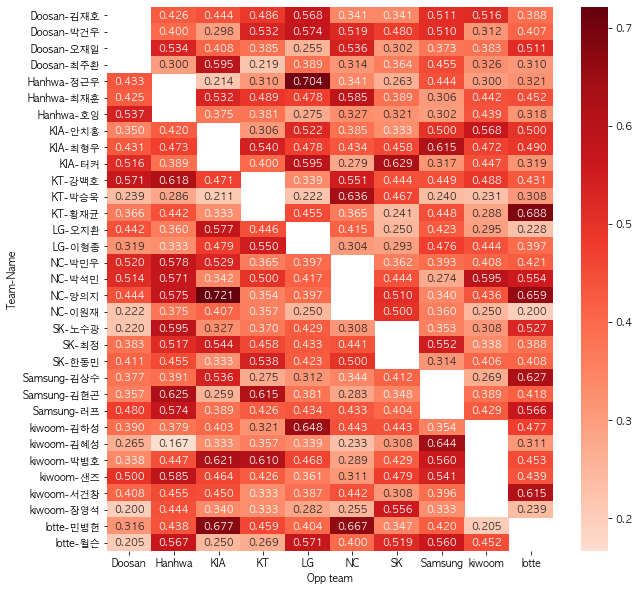

In [37]:
fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = top_pivot, 
            annot = True, fmt = '.3f', 
            cmap = 'Reds',
            center= 0.4   
           )

<AxesSubplot:xlabel='Opp team', ylabel='Team-Name'>

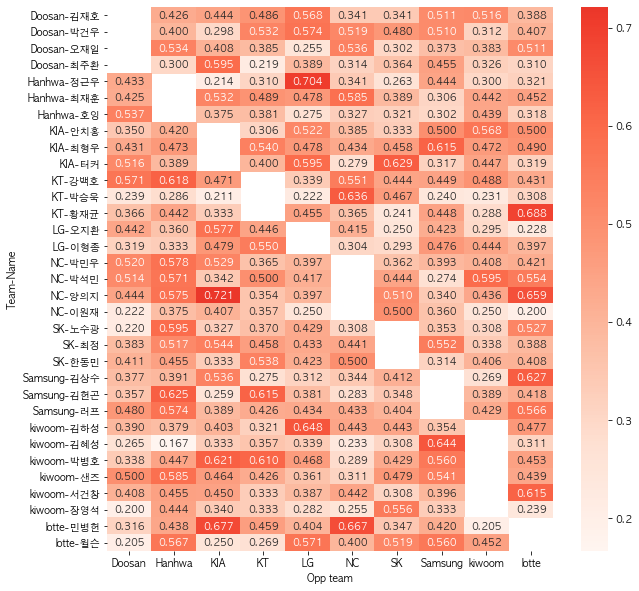

In [39]:
#setting center = 0.6 makes top batter stands out on the graph
fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = top_pivot, 
            annot = True, fmt = '.3f', 
            cmap = 'Reds',
            center= 0.6   
           )